# Victorian Real Estate Prices Dataset

--> This project aims to conduct an in-depth analysis of Victorian real estate data with the objective of estimating the selling price of properties.

--> Given the nature of predicting a continuous value, specifically the property prices, this task is framed as a regression problem. To achieve this, I have employed the RandomForest regression algorithm for predictive modeling.

## 1. Import required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

## 2. Read the dataset

In [ ]:
df=pd.read_csv("_sold.csv")
df.head()

,latitude,longitude,streetAddress,suburb,postcode,region,bedrooms,bathrooms,parkingSpaces,propertyType,price,listingId,title,dateSold,modifiedDate
0,-38.276067,144.485488,6 Corymbia Circuit,Barwon Heads,3227,bellarine_peninsula,3,2,2,house,"$1,255,000",129714950,Luxurious Coastal Lifestyle Awaits,2018-11-06,2018-11-06T02:00:19Z
1,-38.238159,144.545576,9 La Bella Street,Ocean Grove,3226,bellarine_peninsula,4,2,2,house,"$725,000",129219294,Laid Back Family Living In An Idyllic Location,2018-11-06,2018-11-06T04:01:41Z
2,-37.638387,144.922701,26 Greensted Grove,Roxburgh Park,3064,melbourne___northern_region,4,2,2,house,"$670,000",129517974,Oversized & park-facing,2018-11-06,2018-11-06T02:37:57Z
3,-38.121844,144.332476,80 Calvert Street,Hamlyn Heights,3215,NaN,3,2,1,house,"$600,000",129640018,Cherished Family Home In Leafy Hamlyn Heights,2018-11-06,2018-11-06T02:00:19Z
4,-38.129071,144.323640,295 Church Street,Herne Hill,3218,bellarine_peninsula,3,1,2,house,"$520,000",129459426,Potential Plus,2018-11-06,2018-11-06T02:00:17Z


# 3.Exploratory Data Analysis (EDA)

In [ ]:
#Check the shape of dataframe
df.shape

(105120, 15)

The dataset contains 105120 rows and 15 columns.

In [ ]:
#List the columns
df.columns

Index(['latitude', 'longitude', 'streetAddress', 'suburb', 'postcode',
       'region', 'bedrooms', 'bathrooms', 'parkingSpaces', 'propertyType',
       'price', 'listingId', 'title', 'dateSold', 'modifiedDate'],
      dtype='object')

In [ ]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   latitude       105119 non-null  float64
 1   longitude      105119 non-null  float64
 2   streetAddress  105120 non-null  object 
 3   suburb         105120 non-null  object 
 4   postcode       105120 non-null  int64  
 5   region         99878 non-null   object 
 6   bedrooms       105120 non-null  int64  
 7   bathrooms      105120 non-null  int64  
 8   parkingSpaces  105120 non-null  int64  
 9   propertyType   105120 non-null  object 
 10  price          105120 non-null  object 
 11  listingId      105120 non-null  int64  
 12  title          105120 non-null  object 
 13  dateSold       105120 non-null  object 
 14  modifiedDate   105120 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 12.0+ MB


###**Price column is not numeric**

In [ ]:
#Statistical Description
df.describe()

,latitude,longitude,postcode,bedrooms,bathrooms,parkingSpaces,listingId
count,105119.000000,105119.000000,105120.000000,105120.00000,105120.000000,105120.000000,1.051200e+05
mean,-37.588618,144.986669,3375.773735,2.65429,1.550875,1.553073,1.293164e+08
std,0.612449,0.884748,289.116018,0.79562,0.499316,0.510247,1.023279e+06
min,-38.661799,141.579392,3000.000000,0.00000,0.000000,0.000000,7.418066e+06
25%,-37.998847,144.339984,3101.000000,2.00000,1.000000,1.000000,1.293070e+08
50%,-37.780162,144.962296,3337.000000,3.00000,2.000000,2.000000,1.294218e+08
75%,-37.581211,145.347311,3629.000000,3.00000,2.000000,2.000000,1.294887e+08
max,-36.125909,147.236576,3981.000000,13.00000,5.000000,14.000000,2.022433e+08


## 3.1 Handling missing values

In [ ]:
#Identify missing values
df.isna().sum()

,0
latitude,1
longitude,1
streetAddress,0
suburb,0
postcode,0
region,5242
bedrooms,0
bathrooms,0
parkingSpaces,0
propertyType,0


In [ ]:
#Drop the missing value
df = df.dropna(subset=['latitude','longitude'])

In [ ]:
#Fill the empty region values with "Unknown"
df['region'] = df['region'].fillna("Unknown")

## 3.2 Data Cleaning


In [ ]:
# Set the correct data types
df['dateSold'] = pd.to_datetime(df['dateSold'], errors='coerce')
df['modifiedDate'] = pd.to_datetime(df['modifiedDate'], errors='coerce')

In [ ]:
# Extract date features
df['year_sold'] = df['dateSold'].dt.year
df['month_sold'] = df['dateSold'].dt.month
df['day_sold'] = df['dateSold'].dt.day

In [ ]:
# Analyzing the price column
ca_price_count = (df['price'] == "Contact agent").sum()
print(f"Number of rows with price(Contact Agent): {ca_price_count}")
df[df['price']=='Contact agent'].head()

Number of rows with price(Contact Agent): 15


,latitude,longitude,streetAddress,suburb,postcode,region,bedrooms,bathrooms,parkingSpaces,propertyType,price,listingId,title,dateSold,modifiedDate,year_sold,month_sold,day_sold
68,-37.917724,144.990745,1/15 Sussex Street,Brighton,3186,bayside,3,1,1,unit,Contact agent,129552114,"Rare Villa Unit, Blue-Ribbon Setting",2018-11-03,2018-11-03 02:00:20+00:00,2018,11,3
159,-37.852103,145.009955,11 Wynnstay Road,Prahran,3181,inner_east_melbourne,5,3,3,house,Contact agent,129482426,“St. Remy”,2018-11-01,2018-11-04 13:55:31+00:00,2018,11,1
161,-38.260129,145.025695,53 Maude Street,Mount Martha,3934,mornington_peninsula,4,3,2,house,Contact agent,129606378,Anyone for Tennis?,2018-11-01,2018-11-01 23:23:06+00:00,2018,11,1
221,-37.806703,144.984142,22 Derby Street,Collingwood,3066,melbourne_city___greater_region,2,2,1,house,Contact agent,129479482,"Derby House, circa 1872. Period elegance & mod...",2018-10-31,2018-11-02 13:55:48+00:00,2018,10,31
322,-37.893339,144.997646,45 Brickwood Street,Brighton,3186,bayside,4,3,2,house,Contact agent,129721326,A Perfect Family Oasis,2018-10-30,2018-11-03 02:00:21+00:00,2018,10,30


In [ ]:
#Convert the price object from string to float

def convert(price):
    n_price=price.replace('$','').replace(',','').replace('Contact agent','0')
    n_price=int(n_price)
    return n_price

In [ ]:
df['price'] = df['price'].apply(convert)

In [ ]:
# Drop rows where price is 0
df = df[df['price'] != 0]

In [ ]:
#Price column has been added
df.describe()

,latitude,longitude,postcode,bedrooms,bathrooms,parkingSpaces,price,listingId,dateSold,year_sold,month_sold,day_sold
count,105104.000000,105104.000000,105104.000000,105104.000000,105104.000000,105104.000000,1.051040e+05,1.051040e+05,105104,105104.0,105104.000000,105104.000000
mean,-37.588566,144.986662,3375.787001,2.654200,1.550759,1.553014,4.207779e+05,1.293164e+08,2018-10-26 00:45:11.919622144,2018.0,10.002046,25.967975
min,-38.661799,141.579392,3000.000000,0.000000,0.000000,0.000000,1.725000e+05,7.418066e+06,2018-10-26 00:00:00,2018.0,10.000000,1.000000
25%,-37.999516,144.339984,3101.000000,2.000000,1.000000,1.000000,3.760000e+05,1.293070e+08,2018-10-26 00:00:00,2018.0,10.000000,26.000000
50%,-37.780162,144.962296,3337.000000,3.000000,2.000000,2.000000,4.470000e+05,1.294218e+08,2018-10-26 00:00:00,2018.0,10.000000,26.000000
75%,-37.581211,145.347311,3629.000000,3.000000,2.000000,2.000000,4.600000e+05,1.294887e+08,2018-10-26 00:00:00,2018.0,10.000000,26.000000
max,-36.125909,147.236576,3981.000000,13.000000,5.000000,14.000000,6.100000e+06,2.022433e+08,2018-11-06 00:00:00,2018.0,11.000000,31.000000
std,0.612472,0.884811,289.110479,0.795545,0.499157,0.510161,7.566953e+04,1.023349e+06,NaN,0.0,0.045182,1.076727


In [ ]:
df.shape

(105104, 18)

In [ ]:
df.head()

,latitude,longitude,streetAddress,suburb,postcode,region,bedrooms,bathrooms,parkingSpaces,propertyType,price,listingId,title,dateSold,modifiedDate,year_sold,month_sold,day_sold
0,-38.276067,144.485488,6 Corymbia Circuit,Barwon Heads,3227,bellarine_peninsula,3,2,2,house,1255000,129714950,Luxurious Coastal Lifestyle Awaits,2018-11-06,2018-11-06 02:00:19+00:00,2018,11,6
1,-38.238159,144.545576,9 La Bella Street,Ocean Grove,3226,bellarine_peninsula,4,2,2,house,725000,129219294,Laid Back Family Living In An Idyllic Location,2018-11-06,2018-11-06 04:01:41+00:00,2018,11,6
2,-37.638387,144.922701,26 Greensted Grove,Roxburgh Park,3064,melbourne___northern_region,4,2,2,house,670000,129517974,Oversized & park-facing,2018-11-06,2018-11-06 02:37:57+00:00,2018,11,6
3,-38.121844,144.332476,80 Calvert Street,Hamlyn Heights,3215,Unknown,3,2,1,house,600000,129640018,Cherished Family Home In Leafy Hamlyn Heights,2018-11-06,2018-11-06 02:00:19+00:00,2018,11,6
4,-38.129071,144.323640,295 Church Street,Herne Hill,3218,bellarine_peninsula,3,1,2,house,520000,129459426,Potential Plus,2018-11-06,2018-11-06 02:00:17+00:00,2018,11,6


## 3.3 Univariate Analysis

### NUMERICAL COLUMNS
1. Price

In [ ]:
df['price'].describe()

,price
count,1.051040e+05
mean,4.207779e+05
std,7.566953e+04
min,1.725000e+05
25%,3.760000e+05
50%,4.470000e+05
75%,4.600000e+05
max,6.100000e+06


Text(0, 0.5, 'Frequency')

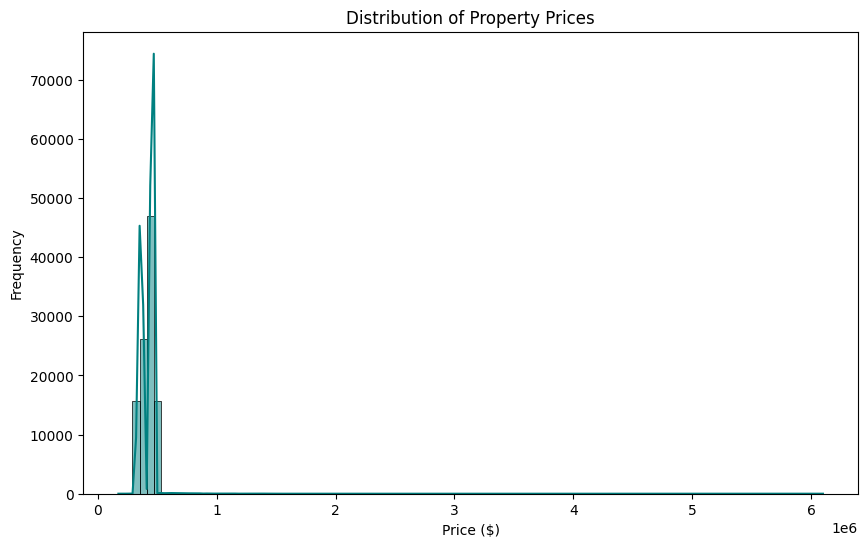

In [ ]:
# Histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=100, kde=True, color='teal')
plt.title('Distribution of Property Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

The graph is right-skewed, which means that most properties are concentrated in the lower to mid price range, while a small number of properties are in high price range.

In [ ]:
#Skewness
df['price'].skew()

np.float64(17.05031938490169)

<Axes: >

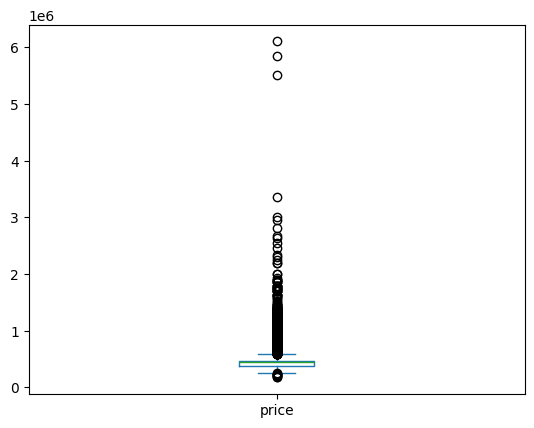

In [ ]:
# Box plot
df['price'].plot(kind='box')

Text(0.5, 1.0, 'Price Scatter Plot')

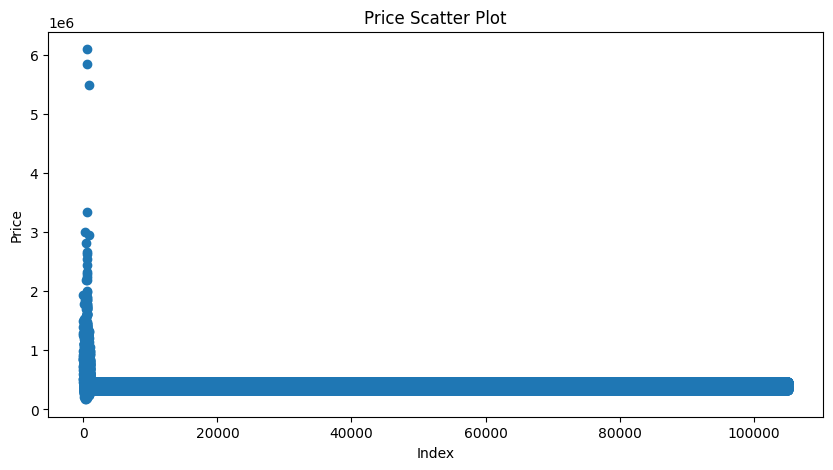

In [ ]:
# Scatter plot
plt.figure(figsize=(10,5))
plt.scatter(df.index, df['price'])

plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Price Scatter Plot')

High priced outliers are shown. The plot highlights that prices are not uniform and depend on multiple affecting factors.

In [ ]:
df[df['price'] > 5000000]

,latitude,longitude,streetAddress,suburb,postcode,region,bedrooms,bathrooms,parkingSpaces,propertyType,price,listingId,title,dateSold,modifiedDate,year_sold,month_sold,day_sold
561,-37.904264,144.986150,4 Moule Ave,Brighton,3186,bayside,6,5,3,house,6100000,129471690,AUCTION THIS SATURDAY,2018-10-27,2018-11-01 13:55:46+00:00,2018,10,27
562,-37.849057,145.036014,37 Elizabeth Street,Malvern,3144,inner_east_melbourne,4,4,4,house,5850000,129460406,Quintessential prestige and perfection,2018-10-27,2018-10-31 13:55:36+00:00,2018,10,27
908,-37.765844,144.916718,56 Holmes Road,Moonee Ponds,3039,melbourne___northern_region,4,4,2,house,5500000,129424730,“Stanhope” Circa 1888: A Work Of Art,2018-10-26,2018-10-26 13:55:40+00:00,2018,10,26


### 2. Bedrooms

In [ ]:
df['bedrooms'].describe()

,bedrooms
count,105104.000000
mean,2.654200
std,0.795545
min,0.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,13.000000


<Axes: >

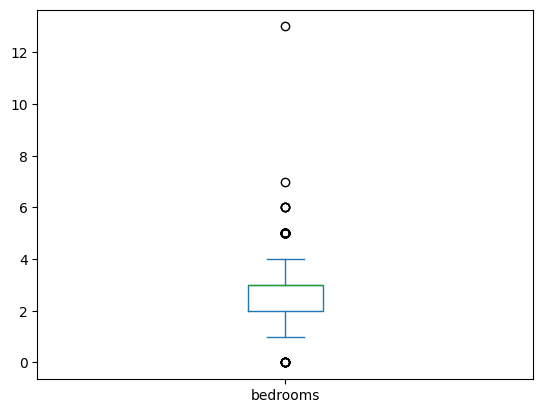

In [ ]:
df['bedrooms'].plot(kind='box')

In [ ]:
df[df['bedrooms']==13]

,latitude,longitude,streetAddress,suburb,postcode,region,bedrooms,bathrooms,parkingSpaces,propertyType,price,listingId,title,dateSold,modifiedDate,year_sold,month_sold,day_sold
574,-37.335473,144.148685,43 Jamieson Street,Daylesford,3460,western_region,13,5,5,house,2001888,129416910,"Developers, Investors and Owner Occupiers 11,3...",2018-10-27,2018-10-30 02:00:26+00:00,2018,10,27


Text(0, 0.5, 'Frequency')

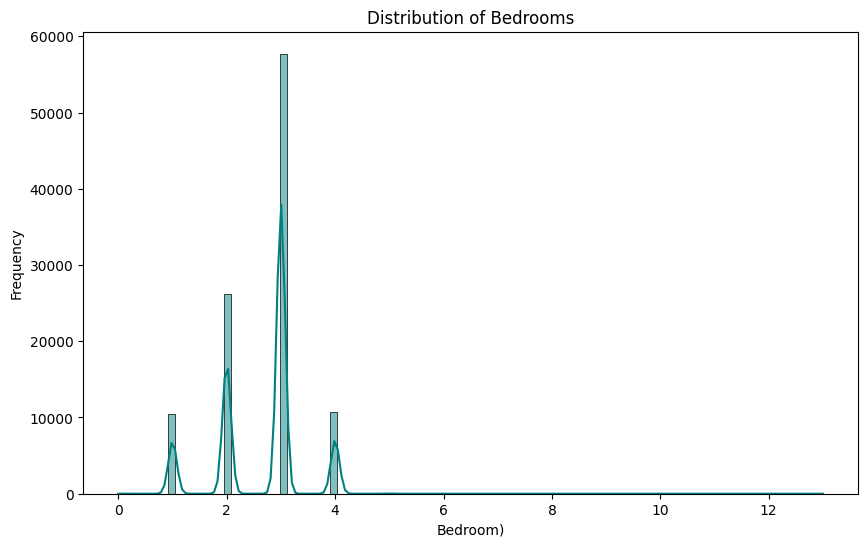

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['bedrooms'], bins=100, kde=True, color='teal')
plt.title('Distribution of Bedrooms')
plt.xlabel('Bedroom)')
plt.ylabel('Frequency')


 Most properties have 2 to 4 bedrooms, indicating that mid sized homes are the most common.

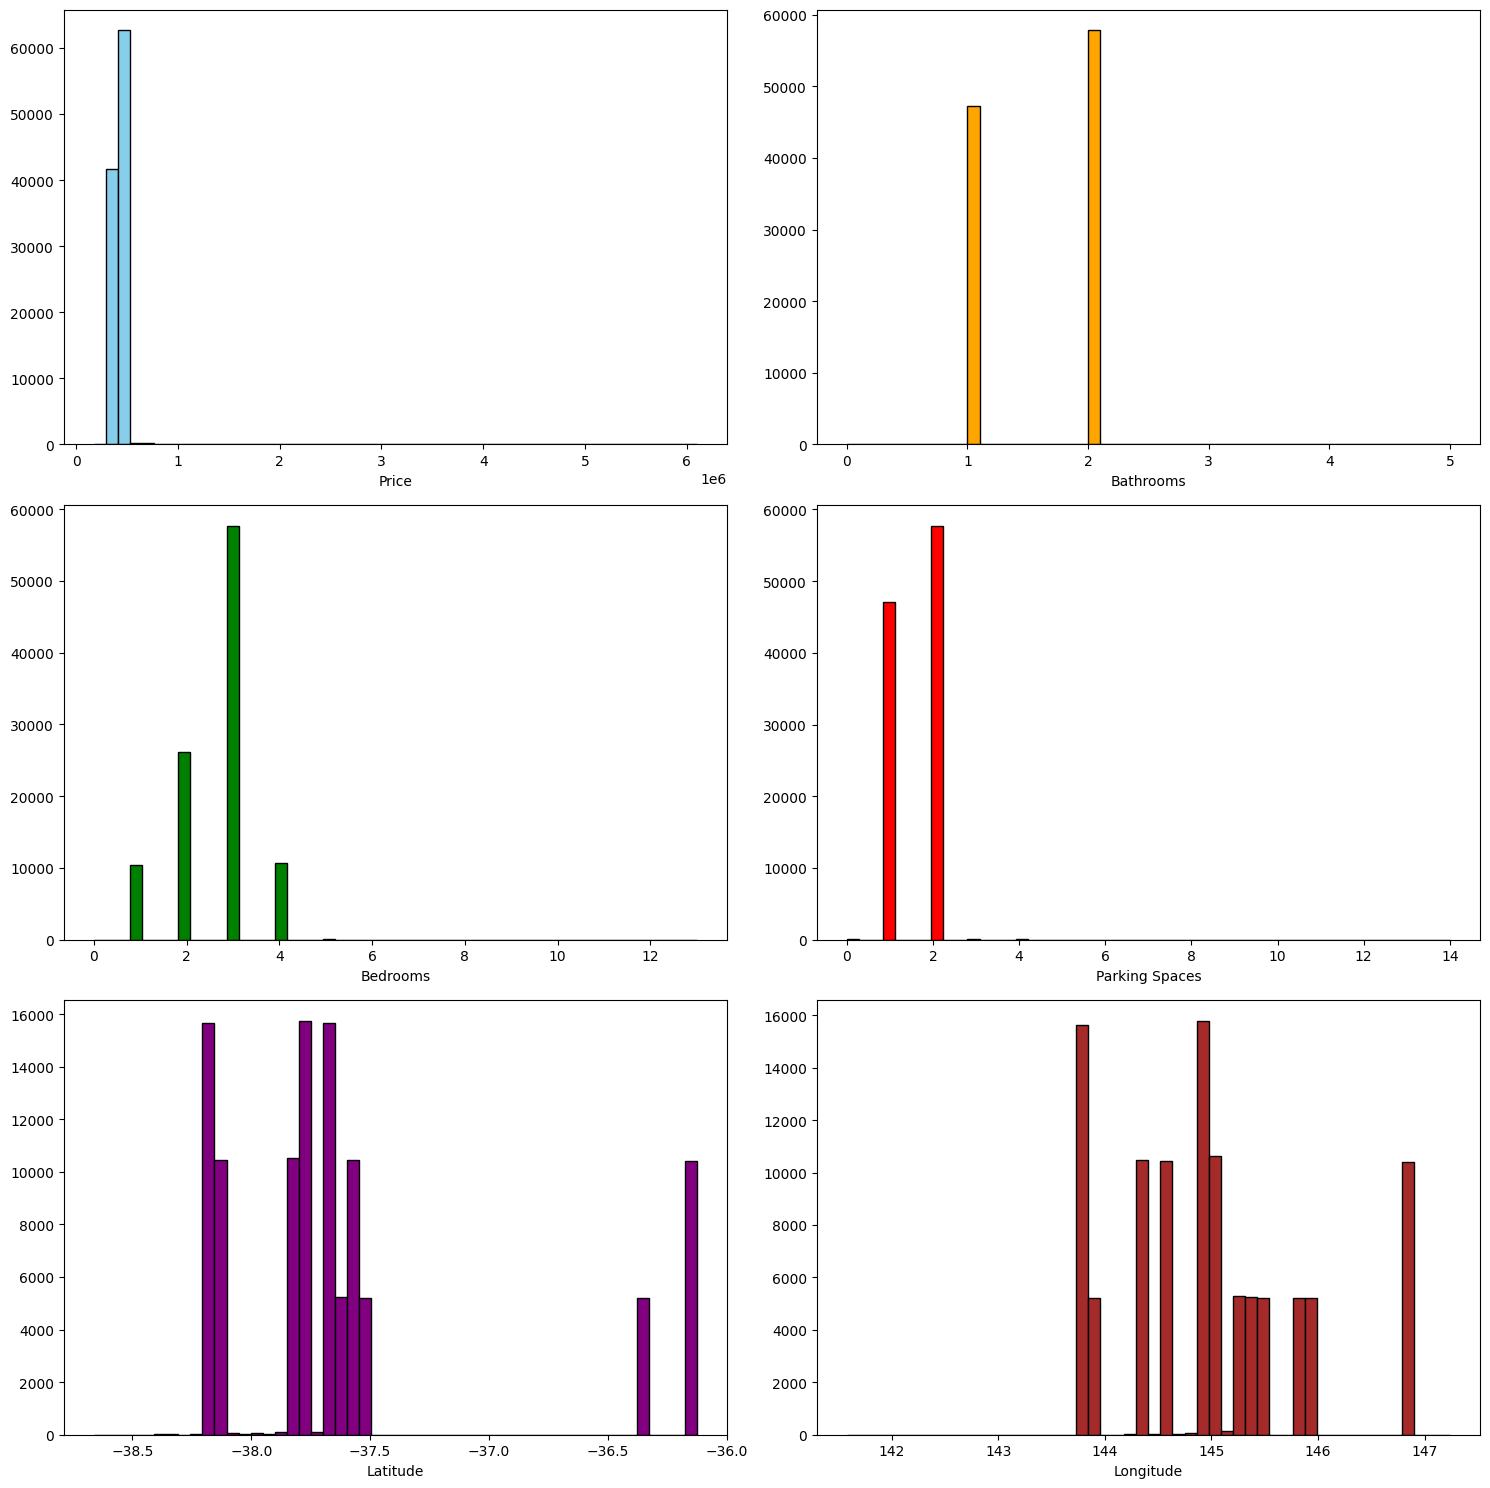

In [ ]:
# Historgrams of numerical columns

def visualization(df):
    fig, ax = plt.subplots(3, 2, figsize=(15, 15))

    ax[0, 0].hist(df['price'], color='skyblue', edgecolor='black', bins=50)
    ax[0, 0].set_xlabel('Price')

    ax[0, 1].hist(df['bathrooms'], color='orange', edgecolor='black', bins=50)
    ax[0, 1].set_xlabel('Bathrooms')

    ax[1, 0].hist(df['bedrooms'], color='green', edgecolor='black', bins=50)
    ax[1, 0].set_xlabel('Bedrooms')

    ax[1, 1].hist(df['parkingSpaces'], color='red', edgecolor='black', bins=50)
    ax[1, 1].set_xlabel('Parking Spaces')

    ax[2, 0].hist(df['latitude'], color='purple', edgecolor='black', bins=50)
    ax[2, 0].set_xlabel('Latitude')

    ax[2, 1].hist(df['longitude'], color='brown', edgecolor='black', bins=50)
    ax[2, 1].set_xlabel('Longitude')

    plt.tight_layout()
    plt.show()

visualization(df)


### CATEGORICAL COLUMNS

### 1. Suburb

In [ ]:
df['suburb'].value_counts()

,count
suburb,
Wodonga,10417
Croydon,5217
Mill Park,5216
Southbank,5215
Warragul,5214
...,...
Travancore,1
Hadfield,1
West Melbourne,1


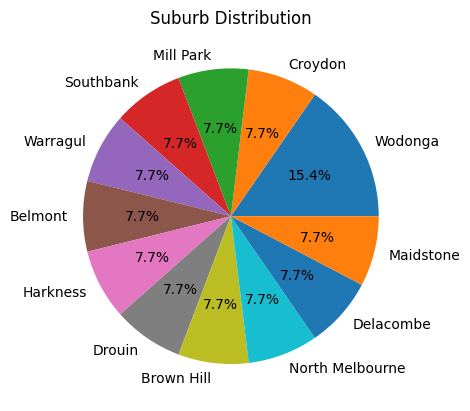

In [ ]:
#Pie chart
df['suburb'].value_counts().head(12).plot(
    kind='pie',
    autopct='%0.1f%%',
    ylabel=''
)
plt.title('Suburb Distribution')
plt.show()


Most properties are mentioned in Wodonga suburb.

### 2. Property Type

In [ ]:
df['propertyType'].value_counts()

,count
propertyType,
house,63184
apartment,20925
unit,15695
townhouse,5272
residential land,10
acreage/semi-rural,8
villa,5
lifestyle,2
farmlet,1


Text(0.5, 1.0, 'Frequency of Property Types')

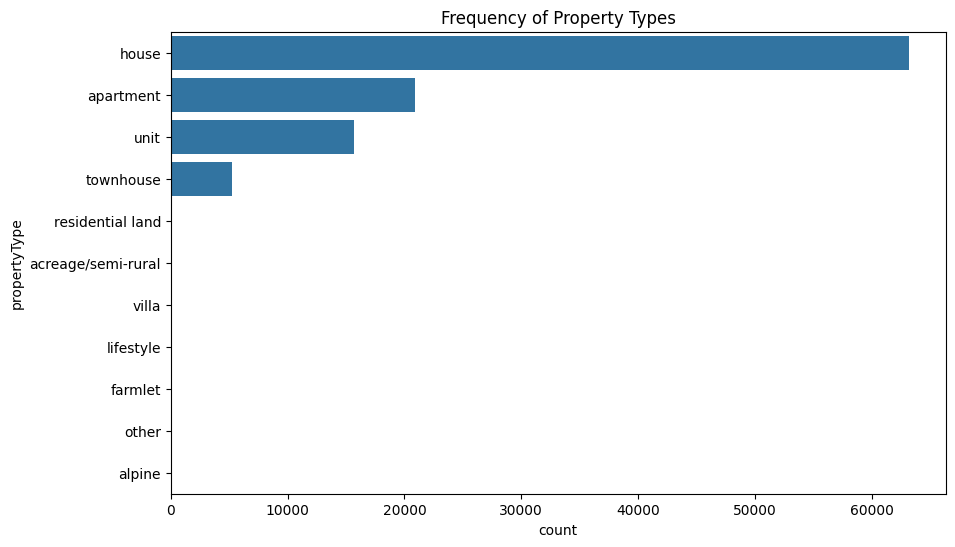

In [ ]:
# Count of Property Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='propertyType', order=df['propertyType'].value_counts().index)
plt.title('Frequency of Property Types')

Houses appear most frequently, followed by apartments and then units.

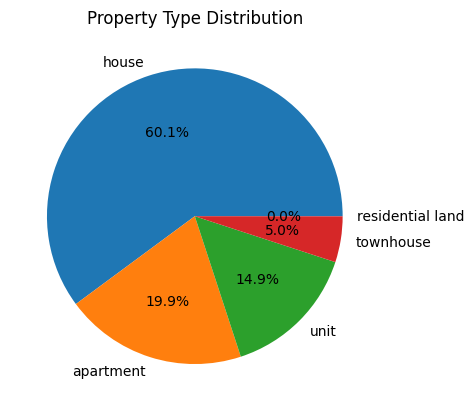

In [ ]:
df['propertyType'].value_counts().head(5).plot(
    kind='pie',
    autopct='%0.1f%%',
    ylabel=''
)
plt.title('Property Type Distribution')
plt.show()


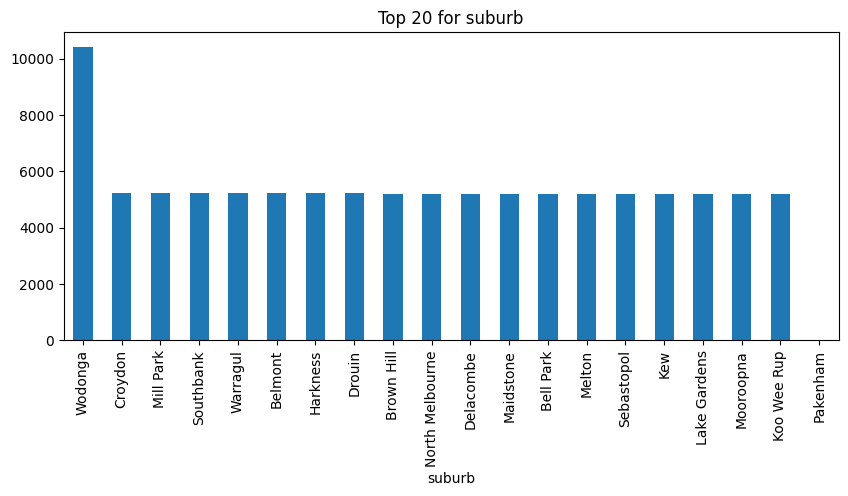

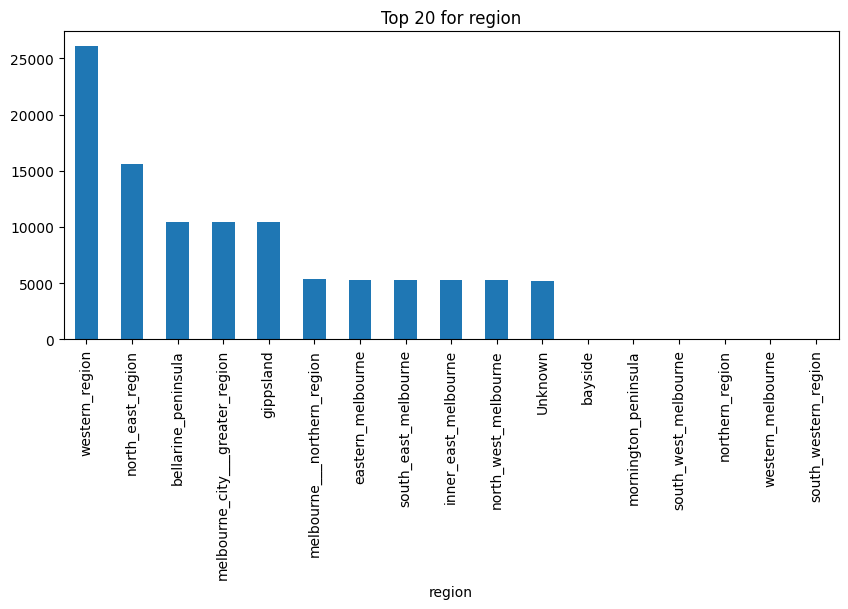

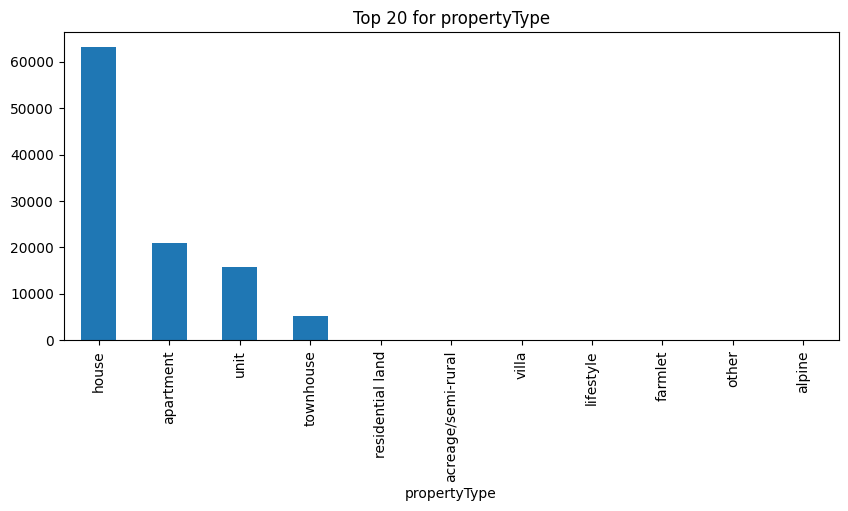

In [ ]:
# Bar charts
cat_cols = ['suburb','region','propertyType']

for col in cat_cols:
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(20).plot(kind='bar')
    plt.title(f"Top 20 for {col}")
    plt.show()

## 3.4 Bivariate Analysis

In [ ]:
# BedRooms vs Property Type
pd.crosstab(df['bedrooms'], df['propertyType'])

propertyType,acreage/semi-rural,alpine,apartment,farmlet,house,lifestyle,other,residential land,townhouse,unit,villa
bedrooms,,,,,,,,,,,
0,0,0,0,0,0,0,0,10,0,0,0
1,0,0,10448,0,1,0,0,0,0,2,0
2,0,0,10469,0,5250,0,0,0,19,10458,4
3,1,0,8,1,47225,1,1,0,5245,5233,1
4,7,1,0,0,10662,1,0,0,8,2,0
5,0,0,0,0,40,0,0,0,0,0,0
6,0,0,0,0,4,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0
13,0,0,0,0,1,0,0,0,0,0,0


Most houses range from 2-4 bedrooms, appropriate for joint families.

Apartments are in 1-2 bedrooms range, appropriate for single families.

Larger properties are also houses.

In [ ]:
# Property Type vs Price Category
df['Price_Category'] = pd.cut(
    df['price'],
    bins=[0, 500000, 1000000, 2000000, df['price'].max()],
    labels=['Low', 'Medium', 'High', 'Luxury']
)


In [ ]:
# Filter only Luxury properties
luxury_properties = df[df['Price_Category'] == 'Luxury']

luxury_properties.head()

,latitude,longitude,streetAddress,suburb,postcode,region,bedrooms,bathrooms,parkingSpaces,propertyType,price,listingId,title,dateSold,modifiedDate,year_sold,month_sold,day_sold,Price_Category
219,-37.781411,145.186582,25 Illawong Drive,Donvale,3111,eastern_melbourne,4,4,4,house,2998000,129043826,Spacious grandeur with resort-style facilities,2018-10-31,2018-11-01 02:00:19+00:00,2018,10,31,Luxury
323,-37.827224,145.076583,32 Maling Road,Canterbury,3126,inner_east_melbourne,4,2,3,house,2810000,129442502,Magnificent Opportunity On Maling Road,2018-10-30,2018-11-06 01:31:23+00:00,2018,10,30,Luxury
324,-37.881725,145.153425,57 Avendon Boulevard,Glen Waverley,3150,eastern_melbourne,4,2,2,house,2200000,129420114,Best of Both Worlds,2018-10-30,2018-11-05 17:45:14+00:00,2018,10,30,Luxury
561,-37.904264,144.986150,4 Moule Ave,Brighton,3186,bayside,6,5,3,house,6100000,129471690,AUCTION THIS SATURDAY,2018-10-27,2018-11-01 13:55:46+00:00,2018,10,27,Luxury
562,-37.849057,145.036014,37 Elizabeth Street,Malvern,3144,inner_east_melbourne,4,4,4,house,5850000,129460406,Quintessential prestige and perfection,2018-10-27,2018-10-31 13:55:36+00:00,2018,10,27,Luxury


In [ ]:
pd.crosstab(df['propertyType'], df['Price_Category'])


Price_Category,Low,Medium,High,Luxury
propertyType,,,,
acreage/semi-rural,1,5,2,0
alpine,0,1,0,0
apartment,20873,48,4,0
farmlet,0,0,1,0
house,62613,423,134,14
lifestyle,0,2,0,0
other,0,0,0,1
residential land,6,2,2,0
townhouse,5219,39,12,2


The majority of properties across all types fall into the "Low" price category, being affordable.



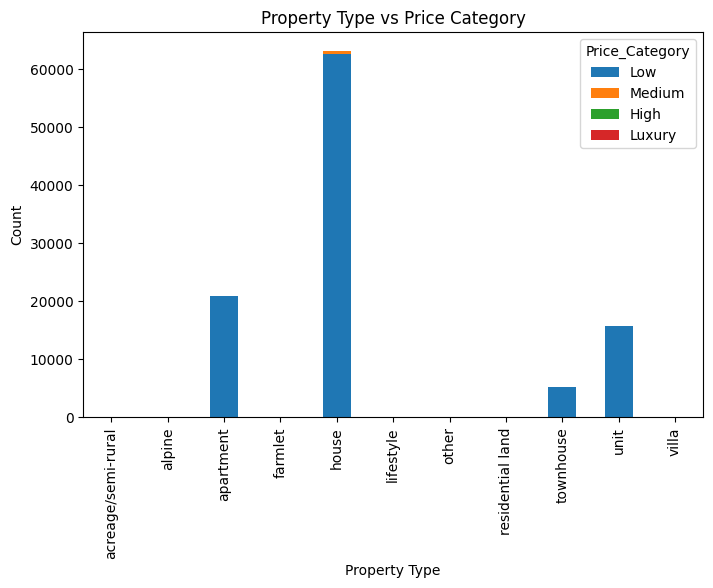

In [ ]:
pd.crosstab(df['propertyType'], df['Price_Category']).plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Property Type vs Price Category")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.show()

In [ ]:
num_cols = ['price','bedrooms','bathrooms','parkingSpaces','latitude','longitude']

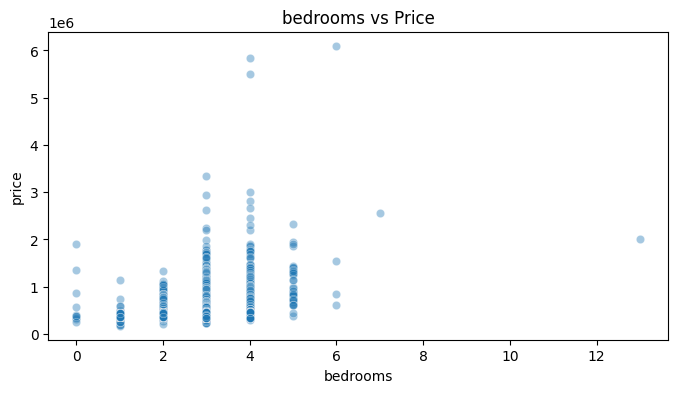

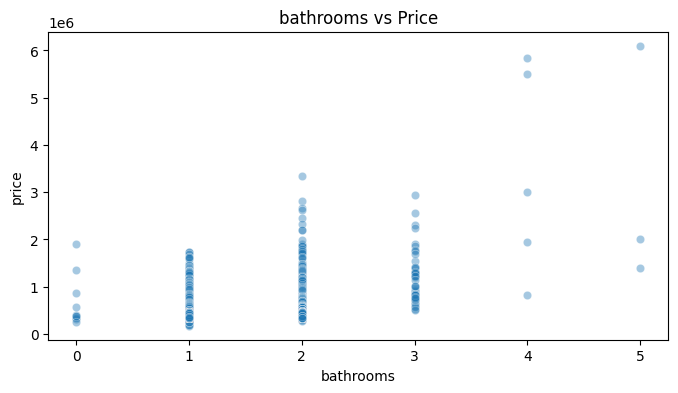

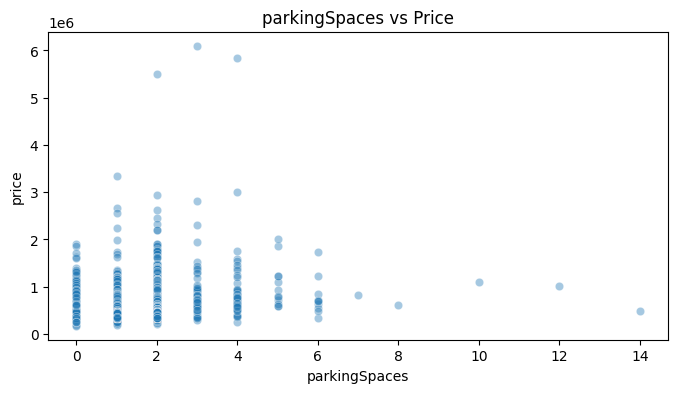

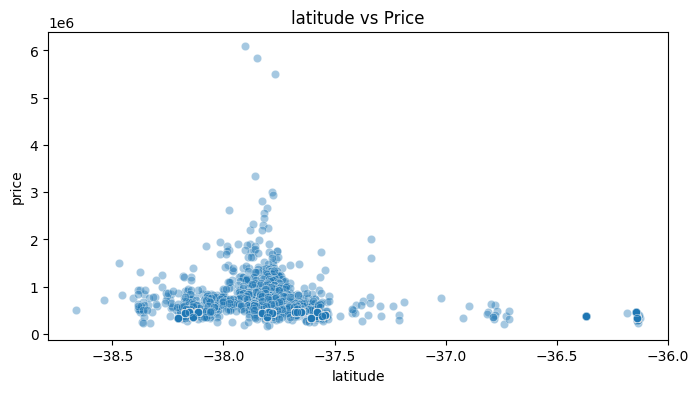

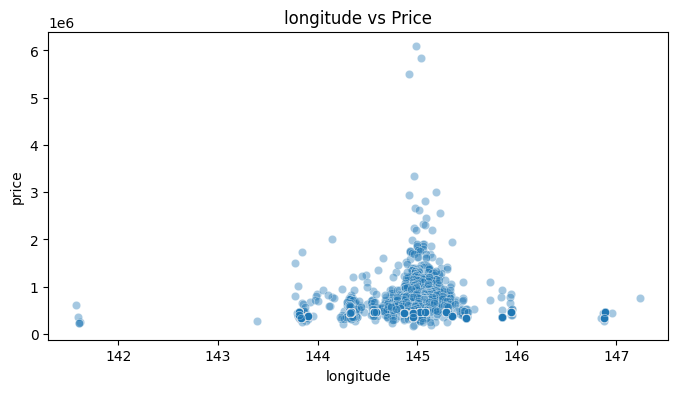

In [ ]:
#Price VS numerical columns
for col in num_cols:
    if col != "price":
        plt.figure(figsize=(8,4))
        sns.scatterplot(data=df, x=col, y="price", alpha=0.4)
        plt.title(f"{col} vs Price")
        plt.show()


/tmp/ipython-input-3535307247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=df, x='bedrooms', y='price', palette='viridis')
/tmp/ipython-input-3535307247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=df, x='bathrooms', y='price', palette='magma')
/tmp/ipython-input-3535307247.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], data=df, x='parkingSpaces', y='price', palette='rocket')


Text(0.5, 1.0, 'Price vs Parking Spaces')

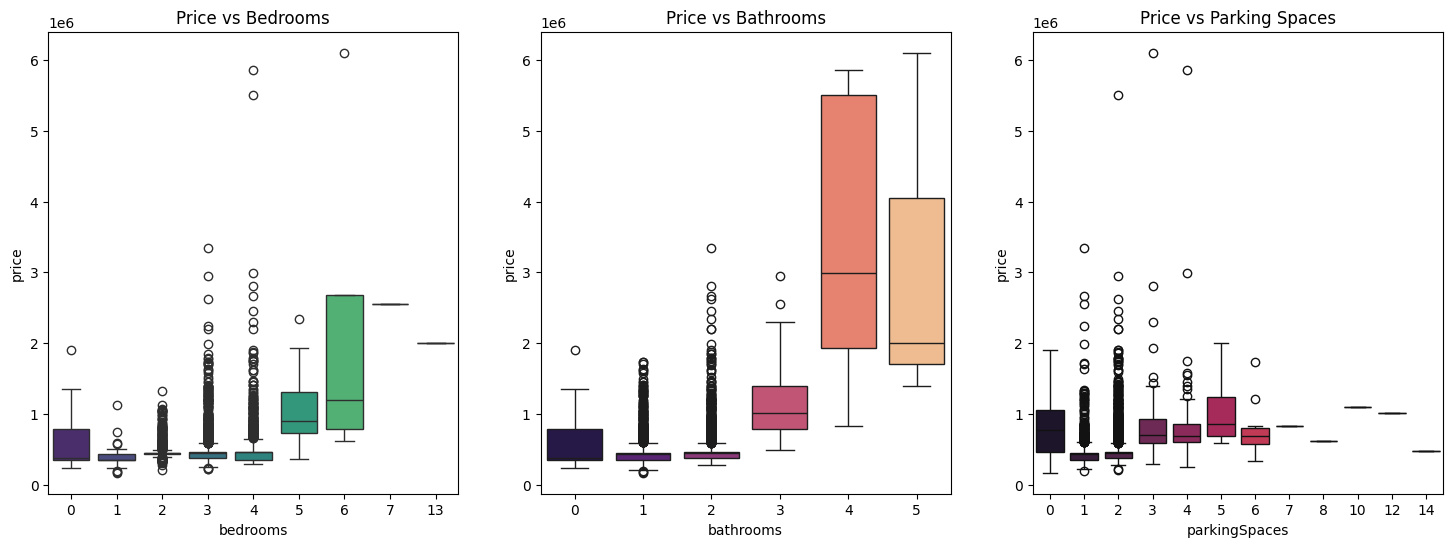

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(ax=axes[0], data=df, x='bedrooms', y='price', palette='viridis')
axes[0].set_title('Price vs Bedrooms')

sns.boxplot(ax=axes[1], data=df, x='bathrooms', y='price', palette='magma')
axes[1].set_title('Price vs Bathrooms')

sns.boxplot(ax=axes[2], data=df, x='parkingSpaces', y='price', palette='rocket')
axes[2].set_title('Price vs Parking Spaces')


# **Price has a weak linear relationship with features like (bedrooms, bathrooms, parkingspaces). This suggests price is determined by multiple interacting factors rather than single features. During modeling, categorical variables (region, property type), and multivariate approaches should be prioritized.**

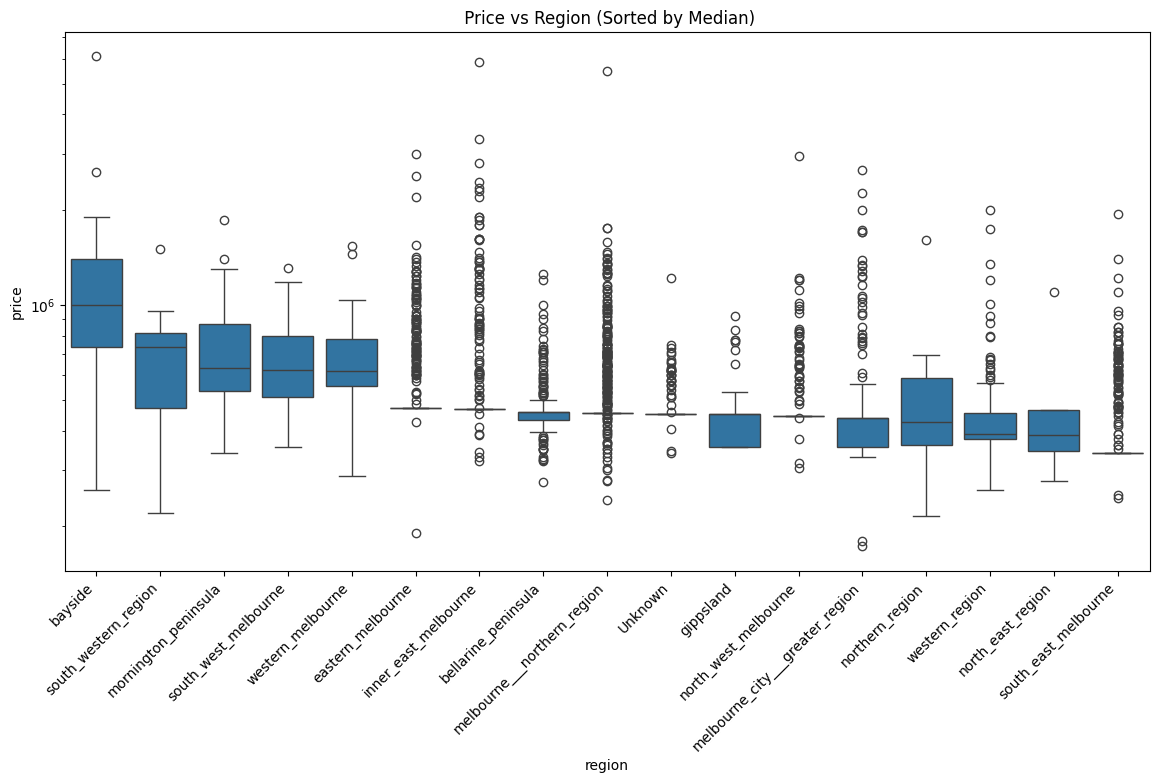

In [ ]:
# Price Distribution by Region
plt.figure(figsize=(14, 7))
region_order = df.groupby('region')['price'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='region', y='price', order=region_order)
plt.title(' Price vs Region (Sorted by Median)')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')


**Bayside has the highest median price, followed by south western region and the mornington peninsula,while gippsland, unknown and southeast melbourne had some of the lowest. Inner city melbourne and the northern region of melbourne displayed many outliers indicating that even within regions, price heterogeneity exists because of certain characteristics of the properties being sold.**

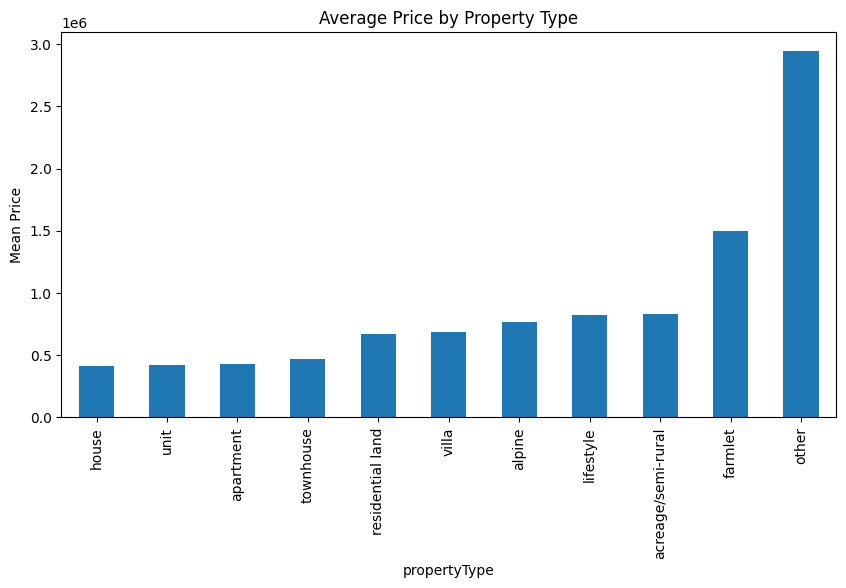

In [ ]:
plt.figure(figsize=(10,5))
df.groupby("propertyType")["price"].mean().sort_values().plot(kind="bar")
plt.title("Average Price by Property Type")
plt.ylabel("Mean Price")
plt.show()


In [ ]:
ct = pd.crosstab(df['region'], df['propertyType'])
ct


propertyType,acreage/semi-rural,alpine,apartment,farmlet,house,lifestyle,other,residential land,townhouse,unit,villa
region,,,,,,,,,,,
Unknown,1,0,6,0,5231,0,0,1,1,1,0
bayside,0,0,8,0,30,0,0,0,13,9,0
bellarine_peninsula,0,0,0,0,54,0,0,1,5213,5212,0
eastern_melbourne,0,0,1,0,85,0,0,0,8,5222,0
gippsland,2,1,0,0,5217,1,0,0,0,5208,0
inner_east_melbourne,0,0,5239,0,34,0,0,2,6,6,2
melbourne___northern_region,0,0,21,0,5347,0,0,3,14,16,3
melbourne_city___greater_region,0,0,10434,0,15,0,0,0,3,1,0
mornington_peninsula,0,0,1,0,45,0,0,1,3,4,0


The crosstab shows that apartments are concentrated in inner Melbourne regions, while houses dominate outer and regional areas, indicating a strong relationship between region and property type.

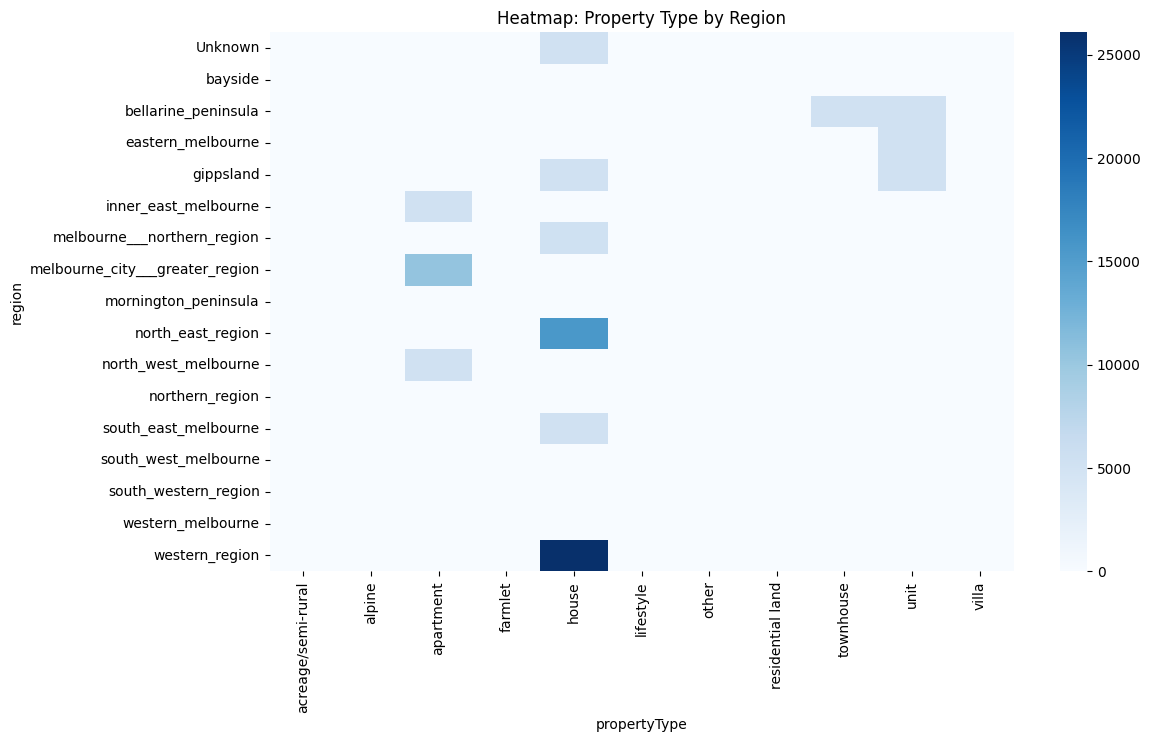

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(ct, cmap="Blues", annot=False)
plt.title("Heatmap: Property Type by Region")
plt.show()


## 3.4 Multivariate Analysis

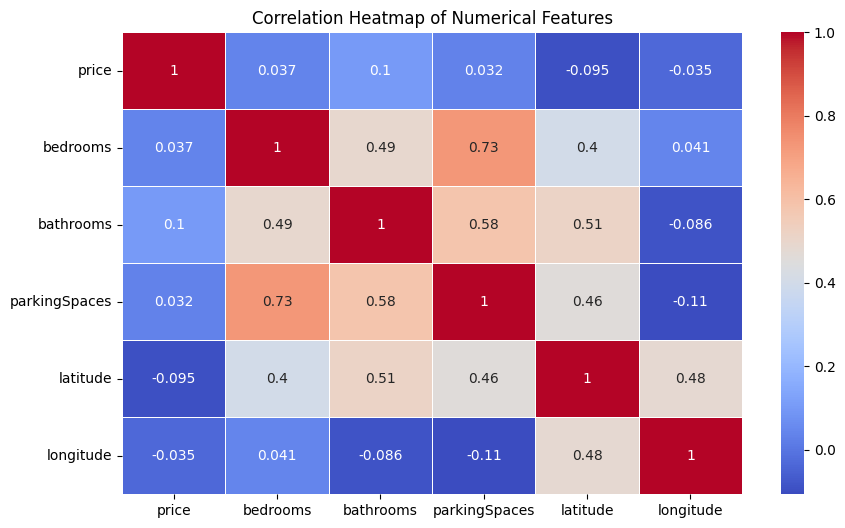

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()



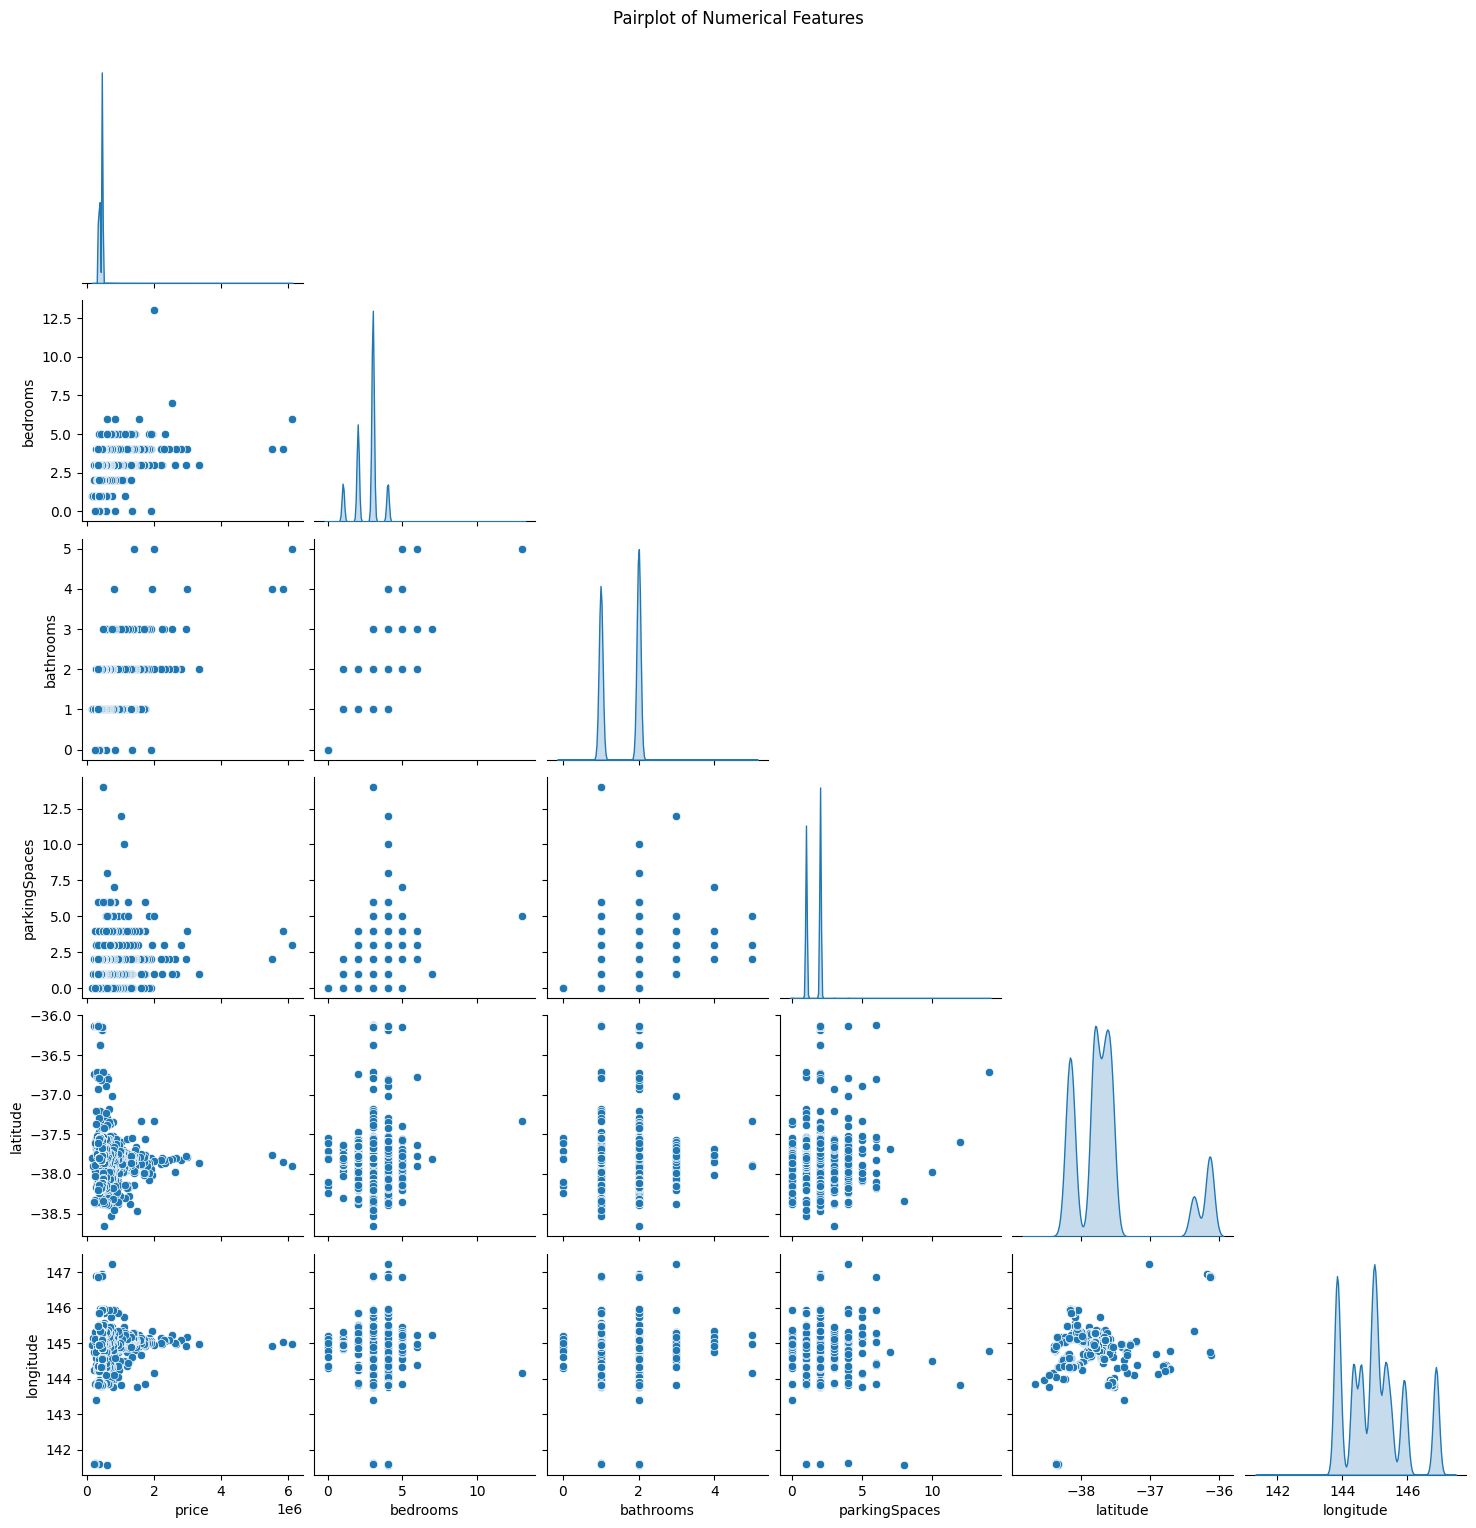

In [ ]:
# Pairplot
sns.pairplot(df[num_cols], corner=True, diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


Text(0, 0.5, 'Latitude')

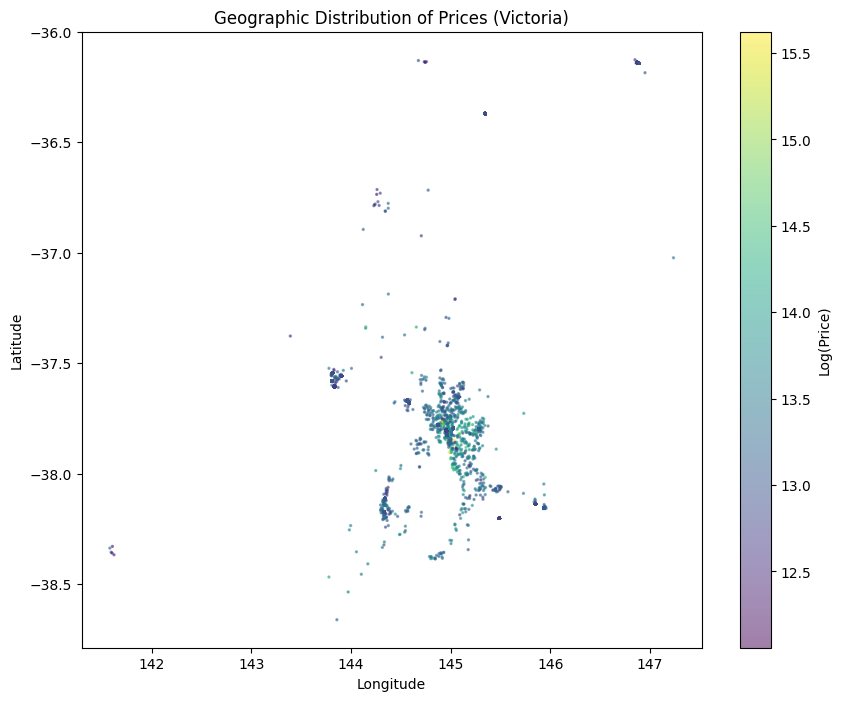

In [ ]:
# Geographic Price Map
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'],
            c=np.log1p(df['price']), cmap='viridis', s=2, alpha=0.5)
plt.colorbar(label='Log(Price)')
plt.title('Geographic Distribution of Prices (Victoria)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Geographic analysis shows clear spatial clustering with highest prices concentrated in Melbourne regions (latitude -37.8 to -38.0, longitude 144.5-145.5), decreasing radially outward.

Text(0, 0.5, 'Average Price ($)')

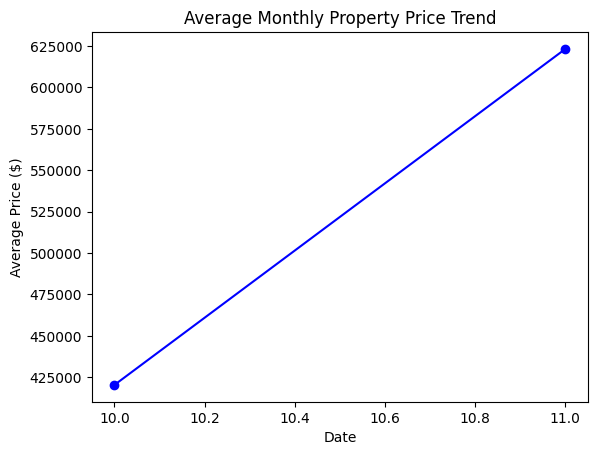

In [ ]:
# Average Price Trend over Months
monthly_avg = df.groupby('month_sold')['price'].mean().reset_index()

plt.plot(monthly_avg['month_sold'], monthly_avg['price'], marker='o', linestyle='-', color='blue')
plt.title('Average Monthly Property Price Trend')
plt.xlabel('Date')
plt.ylabel('Average Price ($)')

In [ ]:
#Unique values
print("Property Type: ", df['propertyType'].nunique())
print("Regions: ",df['region'].nunique())
print("Suburb: ", df['suburb'].nunique())


Property Type:  11
Regions:  17
Suburb:  367


#4. Encoding categorical features (propertyType and region)


In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

le_property = LabelEncoder()
le_region = LabelEncoder()

df['propertyType_encoded'] = le_property.fit_transform(df['propertyType'])
df['region_encoded'] = le_region.fit_transform(df['region'])

In [ ]:
# Create mappings
property_mapping = dict(zip(df['propertyType'], df['propertyType_encoded']))
region_mapping = dict(zip(df['region'], df['region_encoded']))

# Save mappings as pickle
with open('mappings.pkl', 'wb') as f:
    pickle.dump({
        "property": property_mapping,
        "region": region_mapping
    }, f)


### Used label encoding because the unique values for these columns were greater than 10.

#5. Drop the unncecessary features

In [ ]:
df.drop(['streetAddress','postcode', 'suburb', 'region', 'listingId', 'title', 'dateSold', 'modifiedDate','propertyType', 'year_sold', 'month_sold', 'day_sold', 'Price_Category'],axis=1,inplace=True)


In [ ]:
df.head(15)

,latitude,longitude,bedrooms,bathrooms,parkingSpaces,price,propertyType_encoded,region_encoded
0,-38.276067,144.485488,3,2,2,1255000,4,2
1,-38.238159,144.545576,4,2,2,725000,4,2
2,-37.638387,144.922701,4,2,2,670000,4,6
3,-38.121844,144.332476,3,2,1,600000,4,0
4,-38.129071,144.323640,3,1,2,520000,4,2
5,-38.661799,143.858154,3,2,3,515000,4,14
6,-38.032635,144.383849,3,1,1,460000,4,13
7,-38.016903,145.347914,5,4,3,1935000,4,12
8,-38.468454,143.778366,3,1,2,1500000,3,14
9,-37.910070,145.124010,5,2,2,1400000,4,12


#6. Import Libraries for Data Modeling

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error)

In [ ]:
X= df.drop('price',axis=1)

In [ ]:
#Log Transformation
Y = np.log1p(df['price'])

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=700, n_jobs=-1, max_depth=30,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42)

model.fit(x_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=700, n_jobs=-1, random_state=42)

In [ ]:
# Predict on test set
y_pred = model.predict(x_test)

# R² Score
r2 = r2_score(y_test, y_pred)

# MAE
mae = mean_absolute_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R² score: 0.9568665095926173
MAE: 0.0020443713066914857
RMSE: 0.0289933930620418


In [ ]:
# Convert predictions back to original scale
y_pred_orig = np.expm1(y_pred)   # inverse of log1p
y_test_orig = np.expm1(y_test)

# Metrics in original scale
r2_orig = r2_score(y_test_orig, y_pred_orig)
mae_orig = mean_absolute_error(y_test_orig, y_pred_orig)
rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))

print("R² score (original scale):", r2_orig)
print("MAE (original scale):", mae_orig)
print("RMSE (original scale):", rmse_orig)


R² score (original scale): 0.8809947921990439
MAE (original scale): 1532.7294689624127
RMSE (original scale): 23990.168606472045


In [ ]:
mape = np.mean(np.abs((y_test_orig- y_pred_orig)/y_test_orig)) * 100
print("MAPE:", mape, "%")


MAPE: 0.19550804889975318 %


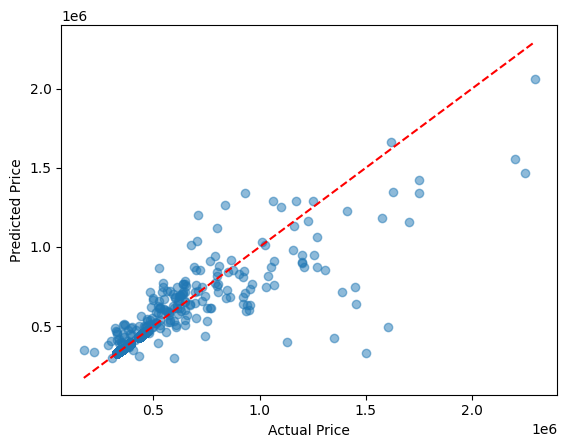

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test_orig, y_pred_orig, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()


In [ ]:
def predict_price(model, X):
    log_pred = model.predict(X)
    return np.expm1(log_pred)


In [ ]:
predict_price(
    model,
    [[-37.638387,	144.922701,	4	,2	,2	,	4,	6]] #original price: 670000
)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([690665.36686537])

#Save the Model

In [ ]:
import pickle

In [ ]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

In [ ]:
df.to_csv("data.csv", index=False)

In [ ]:
from google.colab import files
files.download("data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Set the parameters
parameters = {'n_estimators': [300, 400, 500, 600, 700, 800], 'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
grid = GridSearchCV(estimator=RandomForestRegressor(criterion='squared_error', random_state=0, n_jobs=-1),
                            param_grid=parameters, scoring='r2',
                            n_jobs=-1, cv=8)

In [ ]:
grid.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
48 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", l

GridSearchCV(cv=8, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300, 400, 500, 600, 700, 800]},
             scoring='r2')

In [ ]:
# Print the best parameters found
print(grid.best_params_)

{'max_features': 'sqrt', 'n_estimators': 700}
